In [ ]:
import numpy as np
import pandas as pd 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Clustering

Suppose a crisis management board has been initiated and wants to learn the hospital characteristics in terms of their capabilities to handle the high utilisation event of COVID-19. Your task is to conduct clustering on this dataset and describe the minimum number of effective clusters identified.

Answer the following questions concerning this data and clustering analysis (add screenshots as appropriate).

1. Identify the data quality problems in this dataset such as unusual data types, missing values, etc., and explain how to fix them.
2. Build a clustering model to profile the hospitals based on the beds and ventilators' capacity. Answer the following:
    *   What clustering algorithm have you used?
    *   List the attributes used in this analysis.
    *   What is the optimal number of clusters identified? How did you reach this optimal number? 
    *   Did you normalise the variables? What was its effect on the model—does the variable normalisation process enable a better clustering solution?
3. For the model with the optimal number of clusters:
    *   Visualise the clusters using ‘pairplot’ and interpret the visualisation
    *   Characterise the nature of each cluster by giving it a descriptive label and a brief description. Hint: use cluster distribution.
4. Build another clustering model to profile the hospitals based on the service provided as well as their beds and ventilators’ capacity. Use the best setting (e.g. variable normalisations, optimal K, etc.) obtained in the previous model. Answer the following:
    *   What clustering algorithm have you used?
    *   List the attributes used in this analysis.
    *   What difference do you see in this clustering interpretation when compared to the previous one?

In [ ]:
# load in data
df = pd.read_csv("/content/drive/My Drive/data/Definitive_Healthcare%3A_USA_Hospital_Beds (1).csv")

In [ ]:
# get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                6623 non-null   float64
 1   Y                                6623 non-null   float64
 2   OBJECTID                         6641 non-null   int64  
 3   HOSPITAL_NAME                    6641 non-null   object 
 4   HOSPITAL_TYPE                    6641 non-null   object 
 5   HQ_ADDRESS                       6641 non-null   object 
 6   HQ_ADDRESS1                      375 non-null    object 
 7   HQ_CITY                          6641 non-null   object 
 8   HQ_STATE                         6641 non-null   object 
 9   HQ_ZIP_CODE                      6641 non-null   int64  
 10  COUNTY_NAME                      6616 non-null   object 
 11  STATE_NAME                       6616 non-null   object 
 12  STATE_FIPS          

In [ ]:
print(df['NUM_LICENSED_BEDS'].describe())
print(df['NUM_LICENSED_BEDS'].value_counts())

count    6447.000000
mean      148.896076
std       181.814435
min         1.000000
25%        26.000000
50%        76.000000
75%       199.000000
max      2059.000000
Name: NUM_LICENSED_BEDS, dtype: float64
25.0      781
16.0      115
60.0      111
40.0      104
49.0       98
         ... 
805.0       1
1004.0      1
900.0       1
1211.0      1
631.0       1
Name: NUM_LICENSED_BEDS, Length: 721, dtype: int64


In [ ]:
print(df['AVG_VENTILATOR_USAGE'].describe())
print(df['AVG_VENTILATOR_USAGE'].value_counts())

count    6524.000000
mean        3.567137
std         5.477416
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        61.000000
Name: AVG_VENTILATOR_USAGE, dtype: float64
0.0     1838
2.0     1750
1.0      620
3.0      515
4.0      335
5.0      235
6.0      209
7.0      165
8.0      131
9.0      104
10.0      83
12.0      62
11.0      60
14.0      57
13.0      49
16.0      42
15.0      34
19.0      25
17.0      24
18.0      21
21.0      19
20.0      18
23.0      17
22.0      14
28.0      10
25.0      10
29.0       8
30.0       7
24.0       7
36.0       6
26.0       6
33.0       5
40.0       4
27.0       4
32.0       4
35.0       4
34.0       3
31.0       3
37.0       2
38.0       2
47.0       2
41.0       1
43.0       1
58.0       1
48.0       1
39.0       1
50.0       1
46.0       1
42.0       1
61.0       1
49.0       1
Name: AVG_VENTILATOR_USAGE, dtype: int64


### K-Means Clustering

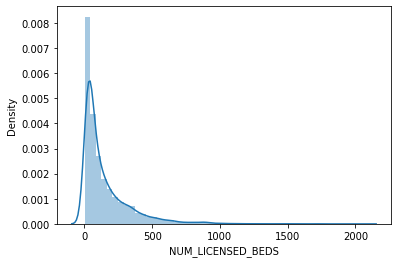

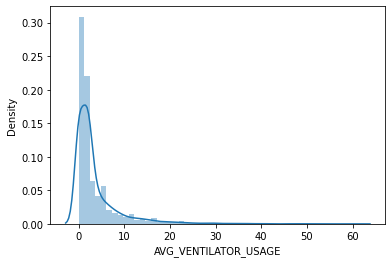

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # ignore warnings

# Distribution of Number of Licenced Beds
sns.distplot(df['NUM_LICENSED_BEDS'].dropna())
plt.show()

# Distribution of Average Ventilator Usage per Week
sns.distplot(df['AVG_VENTILATOR_USAGE'].dropna())
plt.show()

Neither variable has any outliers, so we are free to proceed to the next stage.

In the next stage we will Run a K-means clustering analysis.'

Our objective to to profile hospitals based on their respective number of licenced beds and ventilator usage.

In [ ]:
# lets look at how many unique hospitals are in the data set

print(df['HOSPITAL_NAME'].describe())

count                        6641
unique                       6513
top       Memorial Medical Center
freq                            5
Name: HOSPITAL_NAME, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

# create new data frame including num of licenced beds and ventilator usage
df3 = df[['NUM_LICENSED_BEDS','AVG_VENTILATOR_USAGE']]

# drop all na values
df3 = df3.dropna()

# convert data frame to numpy array
X = df3.to_numpy()

# normalize variables with standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-0.11047792, -0.65701867],
       [ 0.8020926 , -0.29337397],
       [-0.50629164, -0.29337397],
       ...,
       [-0.77566487, -0.65701867],
       [-0.58875283, -0.65701867],
       [-0.62723472, -0.65701867]])

We will focus here on the most common clustering algorithm, K-Means. 

We must first pick the k cluster hyperparamater ***K***. For each iteration of K-means, all data points are assigned to the closest centroids. Each centroid are then updated to get closer to the mean of each cluster. 

The goal here is to minimize intra-cluster distance while maximising the inter-cluster distances. 

Lets first determine our k cluster hyperparameter by running a for loop to determine best k for fit. 

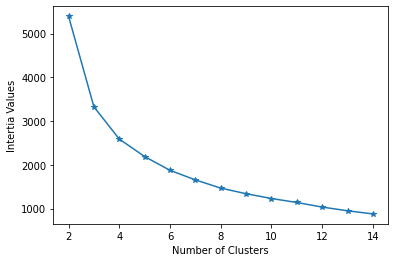

In [ ]:
from sklearn.cluster import KMeans

# set random state
rs = 1010

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.xlabel("Number of Clusters")
plt.ylabel("Intertia Values")
plt.show()

Here the K value lies somewhere between 3 and 6. We can use silhouette scores to determine best K for model.

In [ ]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=4", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=5", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette score for k=6", silhouette_score(X, clusters[4].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=1010, tol=0.0001, verbose=0)
Silhouette score for k=3 0.6320284713135622
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=1010, tol=0.0001, verbose=0)
Silhouette score for k=4 0.5821915397021858
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=1010, tol=0.0001, verbose=0)
Silhouette score for k=5 0.5096571519236966
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=1010, tol=0.0001, verbose=0)
Silhouette score for k=6 0.5212593134456465


Here we can see that the highest K score returned was k=3 where the Silhouette Score was equal to 0.63202. 

We can continue with K value of 3.

Sum of intra-cluster distance: 3325.8518356765867
Centroid locations:
[0.99775169 0.68356715]
[-0.43914338 -0.38671592]
[2.95502402 3.46890166]
Cluster membership
1    4865
0    1281
2     289
Name: Cluster_ID, dtype: int64


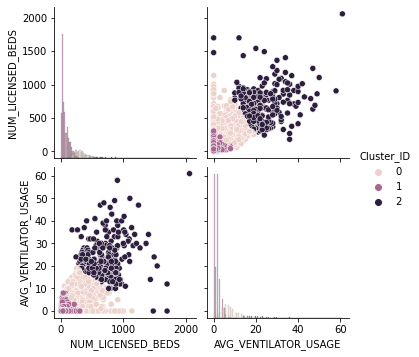

In [ ]:
# visualisation of K=3 clustering solution
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df3['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
sns.pairplot(df3, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for Cluster 1


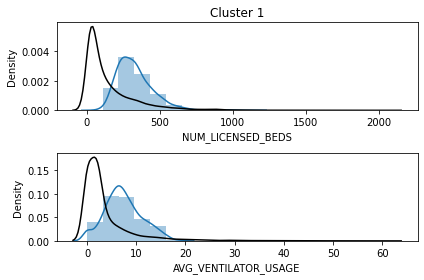

Distribution for Cluster 2


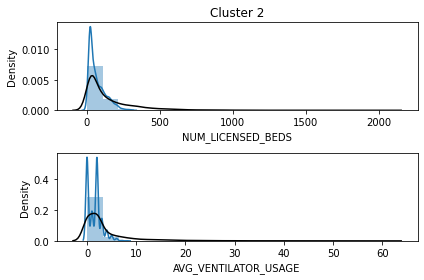

Distribution for Cluster 3


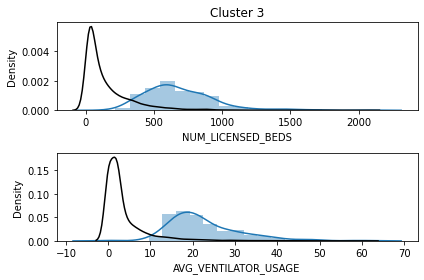

In [ ]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['NUM_LICENSED_BEDS','AVG_VENTILATOR_USAGE']
n_bins = 20

# inspecting cluster 0, 1 and 2
clustersToInspect = [0,1,2]

for cluster in clustersToInspect:
    # inspecting cluster 0
    print("Distribution for Cluster {}".format(cluster + 1))

    # create subplots
    fig, ax = plt.subplots(nrows=2)
    ax[0].set_title("Cluster {}".format(cluster + 1))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df3[col]), max(df3[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

### K-Prototypes Clustering

We will now build another clustering model to profile the hospitals based on the service provided as well as their beds and ventilators’ capacity.

Let us consider the data set with 3 variables:

* `HOSPITAL_TYPE`: Type of Hospital
* `NUM_LICENSED_BEDS`: Number of licensed beds available
* `AVG_VENTILATOR_USAGE`:  Average number of patients on a ventilator per week based


In [ ]:
# create new data frame with hospital type variable
df4 = df[['HOSPITAL_TYPE','NUM_LICENSED_BEDS','AVG_VENTILATOR_USAGE']]

# show information related to df4
print(df4.info())

# drop all columns that have na values
df5 = df4.dropna()

print()
print("DataFrame after all na's removed")


print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HOSPITAL_TYPE         6641 non-null   object 
 1   NUM_LICENSED_BEDS     6447 non-null   float64
 2   AVG_VENTILATOR_USAGE  6524 non-null   float64
dtypes: float64(2), object(1)
memory usage: 155.8+ KB
None

DataFrame after all na's removed
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6548
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HOSPITAL_TYPE         6435 non-null   object 
 1   NUM_LICENSED_BEDS     6435 non-null   float64
 2   AVG_VENTILATOR_USAGE  6435 non-null   float64
dtypes: float64(2), object(1)
memory usage: 201.1+ KB
None


`HOSPITAL_TYPE` is a categorical variable, therefore it has to be mapped to numeric values before using it in the model.

In [ ]:
print(df5['HOSPITAL_TYPE'].unique())

['VA Hospital' 'Short Term Acute Care Hospital' 'Critical Access Hospital'
 'Childrens Hospital' 'Long Term Acute Care Hospital'
 'Psychiatric Hospital' 'Rehabilitation Hospital'
 'Religious Non-Medical Health Care Institution'
 'Department of Defense Hospital']


In [ ]:
from sklearn.preprocessing import StandardScaler
# WARNING : do not run cell twice, or mapping will break.

# mapping
hospitalTypeMap = {'VA Hospital': 1, 'Short Term Acute Care Hospital': 2, 'Critical Access Hospital': 3, 'Childrens Hospital': 4, 'Long Term Acute Care Hospital': 5, 'Psychiatric Hospital': 6, 'Rehabilitation Hospital': 7, 'Religious Non-Medical Health Care Institution': 8, 'Department of Defense Hospital': 9}
df5['HOSPITAL_TYPE'] = df5['HOSPITAL_TYPE'].map(hospitalTypeMap)



df5

,HOSPITAL_TYPE,NUM_LICENSED_BEDS,AVG_VENTILATOR_USAGE
0,1,129.0,0.0
1,1,295.0,2.0
2,1,57.0,2.0
3,1,216.0,2.0
4,1,60.0,1.0
...,...,...,...
6539,6,82.0,0.0
6542,2,8.0,0.0
6544,2,8.0,0.0
6545,2,42.0,0.0


In [ ]:
# convert df to matrix
X = df5.to_numpy()

X

array([[  1., 129.,   0.],
       [  1., 295.,   2.],
       [  1.,  57.,   2.],
       ...,
       [  2.,   8.,   0.],
       [  2.,  42.,   0.],
       [  7.,  35.,   0.]])

In [ ]:
# scaling

scaler = StandardScaler()

X = scaler.fit_transform(X)

X

array([[-1.24887101, -0.11047792, -0.65701867],
       [-1.24887101,  0.8020926 , -0.29337397],
       [-1.24887101, -0.50629164, -0.29337397],
       ...,
       [-0.65542211, -0.77566487, -0.65701867],
       [-0.65542211, -0.58875283, -0.65701867],
       [ 2.31182237, -0.62723472, -0.65701867]])

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [ ]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[0])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

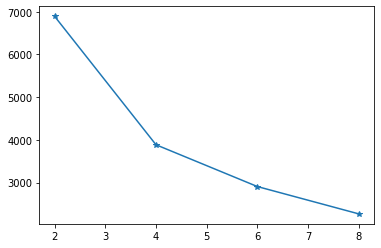

In [ ]:
# plot the cost vs K values
import matplotlib.pyplot as plt 

plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

From observing the graph above, the elbow sits at K=4. However, most likely lies between 4 and 6. 

We can use the silhoutte score to find the optimal value. 

Due to the presence of mixed data types (categorical and numerical), the calculation of the SS for `Kprototypes` is different from `Kmeans`. There will be two seperate scores - therefore we need to average them to find a overal SS.

In [ ]:
X_num = [[row[1], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[0]] for row in X] # variables of X with categorical datatype

In [ ]:
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=:6 " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

The avg Silhouette score for k=4: 0.0021241792490612893
The avg Silhouette score for k=:6 0.008710915949094053
The avg Silhouette score for k=8: 0.06733360352380009


# Association Mining

Consider each patients’ route as a transaction and build an association mining model on this dataset to identify the common routes that positive patients have travelled. The task is to conduct Association analysis on this dataset.

1. What variables did you include in the analysis? Justify your choice.
2. Conduct association mining and answer the following:
  (a) What is the ‘min_support’ threshold set? Discuss why it is chosen.
  (b) Report the top 5 frequently occurring rules and interpret them.
3. Identify at least 10 common routes that positive patients from ‘Daegu_Buk-gu’ have travelled.
4. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.
5. How can the outcome of this study be used by the decision-makers?

### Variable Selection
**What variables did you include in the analysis? Justify your choice.**

The variables that we used for our analysis were patient_id, location and date. We chose patient_id as it uniquely identifies each patient which is crucial so we can group the locations visited by these uniquely identified patients accurately, forming a transaction for that patient. Additionally, we picked this over global_num as not every patient has a global_num assigned to them.

Location is chosen as it forms the basis of a route a patient has taken which would be used in the association mining section. Lastly, we picked date as it provides us with a historical record of the locations visited by each patient. This forms the basis for the sequence analysis that we will perform later on in this section as well.

### Find Associations
**Conduct association mining and answer the following:**
  
  (a) What is the ‘min_support’ threshold set? Discuss why it is chosen.

  (b) Report the top 5 frequently occurring rules and interpret them.

  

In [ ]:
# Initialize patient route data
patientRouteData = pd.read_csv("/content/drive/My Drive/data/PatientRoute.csv")
print(patientRouteData)

      patient_id  global_num  ...   latitude   longitude
0     1000000001         2.0  ...  37.615246  126.715632
1     1000000001         2.0  ...  37.567241  127.005659
2     1000000002         5.0  ...  37.592560  127.017048
3     1000000002         5.0  ...  37.591810  127.016822
4     1000000002         5.0  ...  37.563992  127.029534
...          ...         ...  ...        ...         ...
6709  6100000090         NaN  ...  37.558654  126.794474
6710  6100000090         NaN  ...  35.173220  128.946459
6711  6100000090         NaN  ...  35.336944  129.026389
6712  6100000090         NaN  ...  35.335757  129.025003
6713  6100000090         NaN  ...  35.336944  129.026389

[6714 rows x 6 columns]


In [ ]:
# Remove unused columns from the initialize patient route data i.e. keep only global_num, location and date
patientRouteDataSanitised = patientRouteData.copy()
del patientRouteDataSanitised['latitude']
del patientRouteDataSanitised['longitude']
del patientRouteDataSanitised['global_num']

# Print the sanitised data file
print(patientRouteDataSanitised)

# Get the list of unique locations
uniqueLocations = patientRouteDataSanitised['location'].unique()
print("\n".join(uniqueLocations))

      patient_id        date                     location
0     1000000001  22/01/2020         Gyeonggi-do_Gimpo-si
1     1000000001  24/01/2020                Seoul_Jung-gu
2     1000000002  25/01/2020            Seoul_Seongbuk-gu
3     1000000002  26/01/2020            Seoul_Seongbuk-gu
4     1000000002  26/01/2020           Seoul_Seongdong-gu
...          ...         ...                          ...
6709  6100000090  24/03/2020             Seoul_Gangseo-gu
6710  6100000090  24/03/2020             Busan_Gangseo-gu
6711  6100000090  25/03/2020  Gyeongsangnam-do_Yangsan-si
6712  6100000090  25/03/2020  Gyeongsangnam-do_Yangsan-si
6713  6100000090  25/03/2020  Gyeongsangnam-do_Yangsan-si

[6714 rows x 3 columns]
Gyeonggi-do_Gimpo-si
Seoul_Jung-gu
Seoul_Seongbuk-gu
Seoul_Seongdong-gu
Seoul_Dongdaemun-gu
Seoul_Jungnang-gu
Seoul_Gangnam-gu
Seoul_Jongno-gu
Gyeonggi-do_Goyang-si
Gyeonggi-do_Seongnam-si
Seoul_Songpa-gu
Incheon_Yeonsu-gu
Seoul_Seodaemun-gu
Seoul_Mapo-gu
Gyeonggi-do_Uijeongbu-s

In [ ]:
# Perform an aggregation function so that we group the location visited and the corresponding dates grouped by each unique patient as identified by the global_num.
patientRouteGrouped = patientRouteDataSanitised.groupby('patient_id').agg({'date':', '.join, 'location':', '.join}).reset_index()
print(patientRouteGrouped)

      patient_id  ...                                           location
0     1000000001  ...                Gyeonggi-do_Gimpo-si, Seoul_Jung-gu
1     1000000002  ...  Seoul_Seongbuk-gu, Seoul_Seongbuk-gu, Seoul_Se...
2     1000000003  ...                   Seoul_Jongno-gu, Seoul_Jongno-gu
3     1000000004  ...                                  Seoul_Jungnang-gu
4     1000000005  ...                                  Seoul_Jungnang-gu
...          ...  ...                                                ...
1206  6100000086  ...  Daegu_Dalseong-gun, Gyeongsangnam-do_Changwon-...
1207  6100000087  ...  Gyeongsangnam-do_Changwon-si, Gyeongsangnam-do...
1208  6100000088  ...  Gyeongsangnam-do_Changwon-si, Gyeongsangnam-do...
1209  6100000089  ...  Gyeongsangnam-do_Haman-gun, Gyeongsangnam-do_H...
1210  6100000090  ...  Incheon_Jung-gu, Seoul_Gangseo-gu, Seoul_Gangs...

[1211 rows x 3 columns]


In [ ]:
# Location column now stores a comma seperated list of locations each patient has travelled in chronological order
print(patientRouteGrouped['location'])

0                     Gyeonggi-do_Gimpo-si, Seoul_Jung-gu
1       Seoul_Seongbuk-gu, Seoul_Seongbuk-gu, Seoul_Se...
2                        Seoul_Jongno-gu, Seoul_Jongno-gu
3                                       Seoul_Jungnang-gu
4                                       Seoul_Jungnang-gu
                              ...                        
1206    Daegu_Dalseong-gun, Gyeongsangnam-do_Changwon-...
1207    Gyeongsangnam-do_Changwon-si, Gyeongsangnam-do...
1208    Gyeongsangnam-do_Changwon-si, Gyeongsangnam-do...
1209    Gyeongsangnam-do_Haman-gun, Gyeongsangnam-do_H...
1210    Incheon_Jung-gu, Seoul_Gangseo-gu, Seoul_Gangs...
Name: location, Length: 1211, dtype: object


In [ ]:
# Date column now stores a comma seperated list of dates corresponding to each location that each patient has travelled to
print(patientRouteGrouped['date'])

0                                  22/01/2020, 24/01/2020
1       25/01/2020, 26/01/2020, 26/01/2020, 26/01/2020...
2                                  26/01/2020, 26/01/2020
3                                              30/01/2020
4                                              31/01/2020
                              ...                        
1206       14/03/2020, 18/03/2020, 18/03/2020, 19/03/2020
1207    15/03/2020, 16/03/2020, 19/03/2020, 19/03/2020...
1208    5/03/2020, 6/03/2020, 7/03/2020, 7/03/2020, 10...
1209                               21/03/2020, 22/03/2020
1210    24/03/2020, 24/03/2020, 24/03/2020, 24/03/2020...
Name: date, Length: 1211, dtype: object


In [ ]:
# Drop the date columns for now since we don't need it yet
patientRouteTxn = patientRouteGrouped.copy()
del patientRouteTxn['date']
print (patientRouteTxn)

      patient_id                                           location
0     1000000001                Gyeonggi-do_Gimpo-si, Seoul_Jung-gu
1     1000000002  Seoul_Seongbuk-gu, Seoul_Seongbuk-gu, Seoul_Se...
2     1000000003                   Seoul_Jongno-gu, Seoul_Jongno-gu
3     1000000004                                  Seoul_Jungnang-gu
4     1000000005                                  Seoul_Jungnang-gu
...          ...                                                ...
1206  6100000086  Daegu_Dalseong-gun, Gyeongsangnam-do_Changwon-...
1207  6100000087  Gyeongsangnam-do_Changwon-si, Gyeongsangnam-do...
1208  6100000088  Gyeongsangnam-do_Changwon-si, Gyeongsangnam-do...
1209  6100000089  Gyeongsangnam-do_Haman-gun, Gyeongsangnam-do_H...
1210  6100000090  Incheon_Jung-gu, Seoul_Gangseo-gu, Seoul_Gangs...

[1211 rows x 2 columns]


In [ ]:
# Now that we have the transactions for the locations travelled per patient, we can find the support for each unique location
# To calculate support: Support(loc A) = (Transactions containing (loc A))/(Total Transactions), where loc A is a given location
locationSupportList = []
for location in uniqueLocations:
  locationSupport = []
  locationSupport.append(location)
  locationSupport.append(patientRouteTxn.loc[patientRouteTxn['location'].str.contains(location)].size / 1211)
  locationSupportList.append(locationSupport)

for support in locationSupportList:
  print(support)

# Convert back to a DataFrame for easier data manipulation
df_locationSupportList = pd.DataFrame(locationSupportList)
print(df_locationSupportList)

['Gyeonggi-do_Gimpo-si', 0.016515276630883566]
['Seoul_Jung-gu', 0.11560693641618497]
['Seoul_Seongbuk-gu', 0.03468208092485549]
['Seoul_Seongdong-gu', 0.03303055326176713]
['Seoul_Dongdaemun-gu', 0.06440957886044592]
['Seoul_Jungnang-gu', 0.15194054500412882]
['Seoul_Gangnam-gu', 0.17341040462427745]
['Seoul_Jongno-gu', 0.06936416184971098]
['Gyeonggi-do_Goyang-si', 0.03633360858794385]
['Gyeonggi-do_Seongnam-si', 0.023121387283236993]
['Seoul_Songpa-gu', 0.09083402146985962]
['Incheon_Yeonsu-gu', 0.01981833195706028]
['Seoul_Seodaemun-gu', 0.04459124690338563]
['Seoul_Mapo-gu', 0.05119735755573906]
['Gyeonggi-do_Uijeongbu-si', 0.011560693641618497]
['Gyeonggi-do_Dongducheon-si', 0.0016515276630883566]
['Incheon_Jung-gu', 0.2477291494632535]
['Seoul_Eunpyeong-gu', 0.06936416184971098]
['Daegu_Nam-gu', 0.02477291494632535]
['Seoul_Seocho-gu', 0.07431874483897605]
['Gyeonggi-do_Gwacheon-si', 0.006606110652353427]
['Seoul_Gwangjin-gu', 0.016515276630883566]
['Seoul_Guro-gu', 0.1337737407

In [ ]:
# To calculate confidence: Confidence(loc_A, loc_B) = (Transactions containing both (loc_A and loc_B)) / (Transactions containing loc_A)
locationPairsList = []
for loc_A in uniqueLocations:
  for loc_B in uniqueLocations:
    locationPair = []
    if loc_A == loc_B:
      continue # no self reference
    else:
      locationPair.append(loc_A)
      locationPair.append(loc_B)
      locationPairsList.append(locationPair)

locationConfidenceList = []
for pair in locationPairsList:
  locationConfidence = []
  locationConfidence.append(pair[0])
  locationConfidence.append(pair[1])
  # Confidence(loc_A, loc_B) = (Transactions containing both (loc_A and loc_B)) / (Transactions containing loc_A). 
  # This is a heavy operation, will take about 30 seconds to complete (we only need to run this once to generate the data for the subsequent sections)
  locationConfidence.append(patientRouteTxn.loc[patientRouteTxn['location'].str.contains(pair[0]) & patientRouteTxn['location'].str.contains(pair[1])].size / patientRouteTxn.loc[patientRouteTxn['location'].str.contains(pair[0])].size)
  locationConfidenceList.append(locationConfidence)

# Convert back to a DataFrame for easier data manipulation
df_locationConfidenceList = pd.DataFrame(locationConfidenceList)
print(df_locationConfidenceList)

                                  0                              1    2
0              Gyeonggi-do_Gimpo-si                  Seoul_Jung-gu  0.2
1              Gyeonggi-do_Gimpo-si              Seoul_Seongbuk-gu  0.0
2              Gyeonggi-do_Gimpo-si             Seoul_Seongdong-gu  0.0
3              Gyeonggi-do_Gimpo-si            Seoul_Dongdaemun-gu  0.0
4              Gyeonggi-do_Gimpo-si              Seoul_Jungnang-gu  0.0
...                             ...                            ...  ...
30097  Gyeongsangnam-do_Goseong-gun  Gyeongsangnam-do_Hapcheon-gun  0.0
30098  Gyeongsangnam-do_Goseong-gun    Gyeongsangnam-do_Namhae-gun  0.0
30099  Gyeongsangnam-do_Goseong-gun      Gyeongsangnam-do_Geoje-si  0.0
30100  Gyeongsangnam-do_Goseong-gun            Gyeonggi-do_Osan-si  0.0
30101  Gyeongsangnam-do_Goseong-gun    Gyeongsangnam-do_Miryang-si  0.0

[30102 rows x 3 columns]


In [ ]:
# Sorting the dataframe based on their confidence values
df_locationConfidenceListSorted = pd.DataFrame(df_locationConfidenceList.sort_values(by=[2], ascending=False))

# Remove those where confidence is 0 (These are basically route combinations that do not happen)
df_locationConfidenceListSorted.drop(df_locationConfidenceListSorted.loc[df_locationConfidenceListSorted[2] == 0].index, inplace=True)

print("Routes with highest confidence:\n")
print(df_locationConfidenceListSorted.head(10))

print("\nRoutes with lowest (non-zero) confidence:\n")
print(df_locationConfidenceListSorted.tail(10))

Routes with highest confidence:

                                       0                               1    2
23142  Chungcheongbuk-do_Jeungpyeong-gun  Chungcheongbuk-do_Jincheon-gun  1.0
23038  Chungcheongbuk-do_Jeungpyeong-gun            Gyeonggi-do_Suwon-si  1.0
18072           Jeollanam-do_Boseong-gun                  Gwangju_Buk-gu  1.0
8873              Gyeonggi-do_Gwangju-si           Gyeonggi-do_Yongin-si  1.0
22491       Gyeongsangbuk-do_Chilgok-gun                   Seoul_Jung-gu  1.0
8856              Gyeonggi-do_Gwangju-si              Seoul_Geumcheon-gu  1.0
26521         Gangwon-do_Pyeongchang-gun                    Daegu_Buk-gu  1.0
29011      Gyeongsangbuk-do_Goryeong-gun   Gyeongsangnam-do_Uiryeong-gun  1.0
8829              Gyeonggi-do_Gwangju-si                Seoul_Gangnam-gu  1.0
26244         Gyeongsangbuk-do_Uljin-gun   Gyeongsangbuk-do_Gyeongsan-si  1.0

Routes with lowest (non-zero) confidence:

                    0                               1         2
2

In [ ]:
# To calculate lift: Lift(loc_A, loc_B) = (Confidence(loc_A, loc_B)) / (Support(loc_B))

# We calculated Support from before
print(df_locationSupportList.head(10))

# And we also calculated Confidence from the previous part (probability of location B is travelled to if location A is also travelled)
print(df_locationConfidenceListSorted.head(10))

# Convert Support dataframe to a dictionary for quicker lookup
locationSupportMap = {}
for index, row in df_locationSupportList.iterrows():
  locationSupportMap[row[0]] = row[1]

locationLiftList = []
for index, row in df_locationConfidenceListSorted.iterrows():
  # Get the corresponding support for each location
  support = locationSupportMap.get(row[1])

  # Calculate lift for each location pair transaction, and append it to a list of all calculated lifts thus far
  locationLift = []
  locationLift.append(row[0])
  locationLift.append(row[1])
  calculatedLift = row[2] / support
  locationLift.append(calculatedLift)
  locationLiftList.append(locationLift)

# Sort the calculated lift list based on the transactions with the highest lift
df_locationLiftList = pd.DataFrame(locationLiftList)
df_locationLiftListSorted = pd.DataFrame(df_locationLiftList.sort_values(by=[2], ascending=False))

df_locationLiftListSorted

                         0         1
0     Gyeonggi-do_Gimpo-si  0.016515
1            Seoul_Jung-gu  0.115607
2        Seoul_Seongbuk-gu  0.034682
3       Seoul_Seongdong-gu  0.033031
4      Seoul_Dongdaemun-gu  0.064410
5        Seoul_Jungnang-gu  0.151941
6         Seoul_Gangnam-gu  0.173410
7          Seoul_Jongno-gu  0.069364
8    Gyeonggi-do_Goyang-si  0.036334
9  Gyeonggi-do_Seongnam-si  0.023121
                                       0                               1    2
23142  Chungcheongbuk-do_Jeungpyeong-gun  Chungcheongbuk-do_Jincheon-gun  1.0
23038  Chungcheongbuk-do_Jeungpyeong-gun            Gyeonggi-do_Suwon-si  1.0
18072           Jeollanam-do_Boseong-gun                  Gwangju_Buk-gu  1.0
8873              Gyeonggi-do_Gwangju-si           Gyeonggi-do_Yongin-si  1.0
22491       Gyeongsangbuk-do_Chilgok-gun                   Seoul_Jung-gu  1.0
8856              Gyeonggi-do_Gwangju-si              Seoul_Geumcheon-gu  1.0
26521         Gangwon-do_Pyeongchang-gun       

,0,1,2
22,Chungcheongnam-do_Boryeong-si,Gyeongsangbuk-do_Cheongsong-gun,605.500000
35,Gangwon-do_Taebaek-si,Gyeongsangbuk-do_Bonghwa-gun,605.500000
11,Gyeongsangbuk-do_Bonghwa-gun,Gangwon-do_Taebaek-si,605.500000
26,Gyeongsangbuk-do_Cheongsong-gun,Chungcheongnam-do_Boryeong-si,605.500000
169,Jeollanam-do_Hwasun-gun,Jeollanam-do_Boseong-gun,302.750000
...,...,...,...
2432,Chungcheongnam-do_Cheonan-si,Seoul_Jungnang-gu,0.069279
2453,Seoul_Dongjak-gu,Seoul_Jungnang-gu,0.063284
2403,Seoul_Jungnang-gu,Seoul_Dongjak-gu,0.063284
2429,Chungcheongnam-do_Cheonan-si,Incheon_Jung-gu,0.042491


(a) Minimum support is chosen to be at 2 percent as that is in-line with medical advice on the minimum proportion of infected population to sustain the spread of Covid-19. it's also chosen such that it eliminates lower support groups to enable our model to be more performant.


(b) The top 5 occuring rules are:


1.   **Chungcheongnam-do_Boryeong-si**	and **Gyeongsangbuk-do_Cheongsong-gun**	with lift of **605.5**
2.   **Gangwon-do_Taebaek-si**and **Gyeongsangbuk-do_Bonghwa-gun**	with lift of **605.5**
3. **Jeollanam-do_Hwasun-gun** and **Jeollanam-do_Boseong-gun** with lift of **302.75**
4. **Gyeonggi-do_Anyang-si** and **Gyeonggi-do_Gunpo-si** with lift of **302.75**
5. **Jeollanam-do_Muan-gun** and **Jeollanam-do_Gangjin-gun** with lift of **302.75**

These indicate the locations that patients infected with Covid-19 are most prone to travel between. Authorities should thus work to prevent further travel between this locations to stem the spread of Covid-19 and to contain it within their respective zones.



### Common Routes
**Identify at least 10 common routes that positive patients from ‘Daegu_Buk-gu’ have travelled.**


In [ ]:
# This refers to the likelihood that location B is also travelled if location A is travelled. For this case, location A is ‘Daegu_Buk-gu’, location B is the variable we would change and we derive the most common routes by taking the top confidence values
# We calculated the confidence before, so select all rows where location A is ‘Daegu_Buk-gu’ and print out the top 15 most common routes based on confidence
df_locationConfidenceListSorted[df_locationConfidenceListSorted[1] == "Daegu_Buk-gu"].head(15)

,0,1,2
26521,Gangwon-do_Pyeongchang-gun,Daegu_Buk-gu,1.000000
17871,Jeollanam-do_Goheung-gun,Daegu_Buk-gu,1.000000
29635,Gyeonggi-do_Osan-si,Daegu_Buk-gu,1.000000
28770,Jeollanam-do_Jangheung-gun,Daegu_Buk-gu,1.000000
22542,Gyeongsangbuk-do_Chilgok-gun,Daegu_Buk-gu,0.500000
3165,Daegu_Nam-gu,Daegu_Buk-gu,0.333333
20466,Ulsan_Ulju-gun,Daegu_Buk-gu,0.333333
14584,Daegu_Seo-gu,Daegu_Buk-gu,0.300000
27213,Gyeongsangbuk-do_Pohang-si,Daegu_Buk-gu,0.282051
4030,Daegu_Jung-gu,Daegu_Buk-gu,0.253333


### Sequence Analysis
**Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.**


We are not able to effectively perform sequence analysis on this dataset because there is a significant number of duplicate dates within a particular travel period for a given patient. I.e. if they travel to two or more places in a day. to further prove this point, consider the quality and consistency of data. The quality of data is lacking in this sense as it lacks the granularity of having a time stamp attached to the date. it is also not consistent as multiple patients have the same date for two or more locations, making it difficult to sequence their time of visit in those locations.

### Decision Making
**How can the outcome of this study be used by the decision-makers?**

The findings from this study can be used by decision makes in a number of ways. For one, they are able to determine the areas that are frequently travelled to by Covid-19 positive patients. Given a list of patients and their travel history, they are then able to make informed decisions as to where to send their resources to more effectively combat the spread i.e. the hotspots.

Also, by taking the support, they can derive how many Covid-19 patients have been in a particular location. With information such as the average population in that location at a given time, they can calculate the transmission ratio amongst the population and predict if a location would have its community transmission decay naturally based on lockdown procedures already in place or more aggresive lockdown or mitigation strategies is required.

This study also provides a capabilities of contact tracing as presented briefly in question 3. Say for instance that the location Seoul_Mapo-gu is now declared a hotspot and the authorities would like to perform contact tracing on where people from that area could have potentially visited. This can be quickly done by:

In [ ]:
df_locationConfidenceListSorted[df_locationConfidenceListSorted[1] == "Seoul_Mapo-gu"].head(20)

,0,1,2
20081,Daejeon_Jung-gu,Seoul_Mapo-gu,0.250000
4857,Gyeonggi-do_Icheon-si,Seoul_Mapo-gu,0.250000
19908,Daejeon_Dong-gu,Seoul_Mapo-gu,0.200000
5376,Gyeonggi-do_Paju-si,Seoul_Mapo-gu,0.166667
6587,Seoul_Yangcheon-gu,Seoul_Mapo-gu,0.158730
14718,Busan_Jung-gu,Seoul_Mapo-gu,0.125000
2088,Seoul_Seodaemun-gu,Seoul_Mapo-gu,0.111111
12,Gyeonggi-do_Gimpo-si,Seoul_Mapo-gu,0.100000
4511,Seoul_Yongsan-gu,Seoul_Mapo-gu,0.096774
1396,Gyeonggi-do_Goyang-si,Seoul_Mapo-gu,0.090909


Based on that, the decision makers can then route resources to **Daejeon_Jung-gu** since **25%** of all visitors in that location has been to the hotspot **Seoul_Mapo-gu**. Conversely, **Daegu_Dong-gu** should be the least of the authorities worries since only **4.2%** of all visitors has been to the hotspot. This can also be refined to be a predictive approach where authorities can estimate the travel patterns of various locations and make decisions based on those factors.

Lastly, they can also use these findings to see which location pairs (transactions) are more likely to occur together and take preventive strategies based on that, such as closing borders between particular locations. For instance, following our previous example of **Seoul_Mapo-gu** being the hotspot:

In [ ]:
df_locationLiftListSorted[df_locationLiftListSorted[1] == "Seoul_Mapo-gu"].head(20)

,0,1,2
414,Daejeon_Jung-gu,Seoul_Mapo-gu,4.883065
465,Gyeonggi-do_Icheon-si,Seoul_Mapo-gu,4.883065
545,Daejeon_Dong-gu,Seoul_Mapo-gu,3.906452
720,Gyeonggi-do_Paju-si,Seoul_Mapo-gu,3.255376
726,Seoul_Yangcheon-gu,Seoul_Mapo-gu,3.100358
911,Busan_Jung-gu,Seoul_Mapo-gu,2.441532
979,Seoul_Seodaemun-gu,Seoul_Mapo-gu,2.170251
1113,Gyeonggi-do_Gimpo-si,Seoul_Mapo-gu,1.953226
1122,Seoul_Yongsan-gu,Seoul_Mapo-gu,1.890219
1173,Gyeonggi-do_Goyang-si,Seoul_Mapo-gu,1.775660


We can see that **Daejeon_Jung-gu** has a high correlation with **Seoul_Mapo-gu**	indicating that infected patients frequently travel in those two locations. Following this, **Daejeon_Jung-gu** should also be declared hotspot and with mitigation strategies being put in place as quickly as possible.

# Decision Trees

### **Data Preparation**



**1.  What is the proportion of patients who are classified as COVID-19 positive? Would you require a sampling technique on this data?**

In [ ]:
# Initialize patient database
patientData = pd.read_excel("/content/drive/My Drive/data/dataset.xlsx")
patientData.head()

# Get the proportion of infected cases by finding the number of positive patients divided by the total number of patients recorded
# normalize = True for proportion (much easier :])
proportionPositiveCases = patientData["SARS-Cov-2 exam result"].value_counts(normalize = True)

# print the proportion of positive cases. 
print(proportionPositiveCases)
print()
print("The proportion of positive cases is {}%".format(round(proportionPositiveCases.iloc[1] * 100, 2)))

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

The proportion of positive cases is 9.89%


Undersampling and Oversampling technique would be required for this data as it  a lot of negative cases verses positive cases. Also not all tested parameters are in relevance to the Covid-19 signatures that may denote a potential positive infection, if we refer to the confusion matrix. 

**2.  What variables did you include in the analysis? Justify the choice of input selection (input/target).**

Suppose the hospital is only interested in knowing more about the impact of 'regular blood test' and 'influenza rapid test' group variables. Therefore, your analysis should be focused on the variables of these two groups only in addition to 'Patient age quantile'. The target variable should be set to the 'SARS-Cov-2 exam result' variable.

In [ ]:
# use only the data that we need 
patientData2 = patientData[['SARS-Cov-2 exam result',
                            'Patient age quantile', 
                            'Proteina C reativa mg/dL', 
                            'Neutrophils', 
                            'Mean platelet volume ', 
                            'Monocytes', 
                            'Red blood cell distribution width (RDW)', 
                            'Red blood Cells',
                            'Platelets',
                            'Eosinophils',
                            'Basophils',
                            'Leukocytes',
                            'Mean corpuscular hemoglobin (MCH)',
                            'Mean corpuscular volume (MCV)',
                            'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
                            'Lymphocytes',
                            'Hemoglobin',
                            'Hematocrit',
                            'Influenza A',
                            'Influenza B']]

In [ ]:
# drop all na values, if we were to impute na values this would skew our findings as there is more than 50% of the data missing from each column.

patientData3 = patientData2.dropna(axis=0)

patientData3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 5618
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SARS-Cov-2 exam result                            272 non-null    object 
 1   Patient age quantile                              272 non-null    int64  
 2   Proteina C reativa mg/dL                          272 non-null    float64
 3   Neutrophils                                       272 non-null    float64
 4   Mean platelet volume                              272 non-null    float64
 5   Monocytes                                         272 non-null    float64
 6   Red blood cell distribution width (RDW)           272 non-null    float64
 7   Red blood Cells                                   272 non-null    float64
 8   Platelets                                         272 non-null    float64
 9   Eosinophils         

In [ ]:
# lets look to see if we still have the same proportion of positive vs negative cases.

proportionPositiveCases2 = patientData3['SARS-Cov-2 exam result'].value_counts(normalize = True)

print(proportionPositiveCases2)
print()
print("The proportion of positive cases is {}%".format(round(proportionPositiveCases2.iloc[1] * 100, 2)))

negative    0.852941
positive    0.147059
Name: SARS-Cov-2 exam result, dtype: float64

The proportion of positive cases is 14.71%


In [ ]:
# change covid test, influenza a, influenze b, into binary 0/1 variable

import warnings
warnings.filterwarnings("ignore")

cov2ExamMap = {'negative':0, 'positive': 1}
patientData3['SARS-Cov-2 exam result'] = patientData3['SARS-Cov-2 exam result'].map(cov2ExamMap)

influenzaAMap = {'not_detected':0, 'detected': 1}
patientData3['Influenza A'] = patientData3['Influenza A'].map(influenzaAMap)

influenzaBMap = {'not_detected':0, 'detected': 1}
patientData3['Influenza B'] = patientData3['Influenza B'].map(influenzaBMap)

patientData3

,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa mg/dL,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width (RDW),Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Hemoglobin,Hematocrit,Influenza A,Influenza B
1,0,17,-0.147895,-0.619086,0.010677,0.357547,-0.625073,0.102004,-0.517413,1.482158,-0.223767,-0.094610,-0.292269,0.166192,-0.950790,0.318366,-0.022340,0.236515,0,0
8,0,1,-0.286986,-0.127395,-1.672222,0.068652,-0.978899,-0.850035,1.429667,1.018625,-0.223767,0.364550,0.178175,-1.336024,3.331071,-0.005738,-0.774212,-1.571682,0,0
18,0,11,-0.487674,0.265957,-0.550290,-0.220244,0.171035,0.542763,0.072992,-0.709090,-0.834685,-0.211488,0.334989,0.606842,-0.452899,0.045436,0.792188,0.991838,0,0
28,0,13,-0.434025,0.651115,0.796029,0.068652,0.171035,0.489872,-0.178244,0.217977,2.525365,-0.075131,0.544077,0.767079,-0.353319,-0.730707,0.854844,1.014726,0,0
29,0,14,-0.529401,0.347905,-0.550290,0.121178,-0.713529,0.436981,0.361914,-0.371974,-0.529226,0.105751,0.596348,0.386517,0.642463,-0.227493,0.854844,0.740064,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,1,18,-0.302882,-1.094387,1.132609,1.197969,-0.094334,0.384090,-1.911774,-0.582671,-0.529226,-0.834833,1.589509,1.307876,0.841616,0.966573,1.356092,1.197836,0,0
5602,0,19,3.627427,1.118221,0.908221,1.066653,0.347948,0.384090,-0.102873,0.892207,-0.834685,-0.328365,-0.449085,-0.474754,-0.054585,-1.583611,0.165628,0.190738,0,0
5614,0,19,5.733660,1.134611,-0.774677,1.670707,0.967144,0.754327,0.663397,-0.540532,0.081693,1.569499,-2.174047,-1.976971,-1.050367,-1.532437,-0.523588,-0.289922,0,0
5615,0,15,0.561468,-0.061837,-0.213711,0.909074,-1.155812,0.613284,-0.492289,-0.709090,-0.223767,-0.550988,0.700891,0.005955,1.538664,0.002791,1.105468,0.717175,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

# one-hot encoding
df = pd.get_dummies(patientData3)
    
# target/input split
y = df['SARS-Cov-2 exam result']
X = df.drop(['SARS-Cov-2 exam result'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
negative = X[X['SARS-Cov-2 exam result']==0]
positive = X[X['SARS-Cov-2 exam result']==1]

# upsample minority
positiveUpsampled = resample(positive,
                          replace=True, # sample with replacement
                          n_samples=len(negative), # match number in majority class
                          random_state=10) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([positiveUpsampled, negative])

upsampled['SARS-Cov-2 exam result'].value_counts()

1    161
0    161
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
# target/input split with new upsampled dataframe
y = upsampled['SARS-Cov-2 exam result']
X = upsampled.drop(['SARS-Cov-2 exam result'], axis=1)

# setting up new upsampled testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# simple decision tree training
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

### Decision Tree

**1. What is the classification accuracy of training and test datasets?**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8969072164948454


Model performs quite well on the test data set. However, we still need to tune hyperparameters of the model to ensure it can generalise better to the test set to find an optimal tree. 

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        51
           1       0.85      0.96      0.90        46

    accuracy                           0.90        97
   macro avg       0.90      0.90      0.90        97
weighted avg       0.90      0.90      0.90        97



**What is the size of the tree (number of nodes and rules)?**

In [ ]:
from sklearn.tree import export_text

treeObj = model.tree_
print("Number of nodes: {}".format(treeObj.node_count))
print()

treeRules = export_text(model, feature_names = list(X_train.columns))
print("Tree Rules:")
print(treeRules)

Number of nodes: 29

Tree Rules:
|--- Leukocytes <= -0.38
|   |--- Basophils <= 1.15
|   |   |--- Platelets <= 0.03
|   |   |   |--- Hemoglobin <= -0.81
|   |   |   |   |--- class: 0
|   |   |   |--- Hemoglobin >  -0.81
|   |   |   |   |--- Neutrophils <= 1.11
|   |   |   |   |   |--- Hematocrit <= 1.64
|   |   |   |   |   |   |--- Influenza B <= 0.50
|   |   |   |   |   |   |   |--- Patient age quantile <= 4.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Patient age quantile >  4.50
|   |   |   |   |   |   |   |   |--- Red blood Cells <= -1.05
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Red blood Cells >  -1.05
|   |   |   |   |   |   |   |   |   |--- Mean corpuscular volume (MCV) <= -1.57
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Mean corpuscular volume (MCV) >  -1.57
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Influ

**What variable is used for the first split?**

1.   Leukocytes



**What are the five important variables in building the tree?**

In [ ]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
featureNames = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 5 features
indices = indices[:5]

for i in indices:
    print(featureNames[i], ':', importances[i])

Leukocytes : 0.37317704783971645
Basophils : 0.15008880015231796
Platelets : 0.10110511508518519
Hemoglobin : 0.0849023722830722
Hematocrit : 0.07269979687130089


**What parameters have been used in building the tree? Detail them.**

In [ ]:
print(treeRules)

|--- Leukocytes <= -0.38
|   |--- Basophils <= 1.15
|   |   |--- Platelets <= 0.03
|   |   |   |--- Hemoglobin <= -0.81
|   |   |   |   |--- class: 0
|   |   |   |--- Hemoglobin >  -0.81
|   |   |   |   |--- Neutrophils <= 1.11
|   |   |   |   |   |--- Hematocrit <= 1.64
|   |   |   |   |   |   |--- Influenza B <= 0.50
|   |   |   |   |   |   |   |--- Patient age quantile <= 4.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Patient age quantile >  4.50
|   |   |   |   |   |   |   |   |--- Red blood Cells <= -1.05
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Red blood Cells >  -1.05
|   |   |   |   |   |   |   |   |   |--- Mean corpuscular volume (MCV) <= -1.57
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Mean corpuscular volume (MCV) >  -1.57
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Influenza B >  0.50
|   |   |   |   | 

**Build another decision tree tuned with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

dt_cv_1_gs = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=10),return_train_score=True, cv=10)
dt_cv_1_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
# use grid search to print the best paramaters

print(dt_cv_1_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


**1. What is the classification accuracy of training and test datasets?**

In [ ]:
dt_cv_1 = DecisionTreeClassifier(max_depth=7, random_state=10, criterion='entropy', min_samples_leaf=5)
dt_cv_1.fit(X_train, y_train)

print("Train accuracy:", dt_cv_1.score(X_train, y_train))
print("Test accuracy:", dt_cv_1.score(X_test, y_test))

y_pred = dt_cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9911111111111112
Test accuracy: 0.9278350515463918
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.93      0.91      0.92        46

    accuracy                           0.93        97
   macro avg       0.93      0.93      0.93        97
weighted avg       0.93      0.93      0.93        97



**2. What is the size of the tree (i.e. number of nodes and rules)? Is the size different from the tree in the previous step? Why?**


In [ ]:
treeObj = dt_cv_1.tree_
print("Number of nodes: {}".format(treeObj.node_count))
print()

treeRules = export_text(dt_cv_1, feature_names = list(X_train.columns))
print("Tree Rules:")
print(treeRules)

Number of nodes: 21

Tree Rules:
|--- Leukocytes <= -0.38
|   |--- Basophils <= 1.15
|   |   |--- Platelets <= 0.03
|   |   |   |--- Hemoglobin <= -0.81
|   |   |   |   |--- class: 0
|   |   |   |--- Hemoglobin >  -0.81
|   |   |   |   |--- Leukocytes <= -0.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Leukocytes >  -0.82
|   |   |   |   |   |--- Eosinophils <= -0.67
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Eosinophils >  -0.67
|   |   |   |   |   |   |--- Red blood cell distribution width (RDW) <= -0.93
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Red blood cell distribution width (RDW) >  -0.93
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- Platelets >  0.03
|   |   |   |--- class: 0
|   |--- Basophils >  1.15
|   |   |--- class: 0
|--- Leukocytes >  -0.38
|   |--- Eosinophils <= -0.69
|   |   |--- Leukocytes <= 0.37
|   |   |   |--- Mean platelet volume  <= -0.49
|   |   |   |   |--- class: 0
|   |   |   |--- Mean p

**3. Which variable is used for the first split?**

Leukocytes

**4. What are the five important variables in building the tree?**


In [ ]:
### Enter your code here
importances = dt_cv_1.feature_importances_
featureNames = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(featureNames[i], ':', importances[i])

Leukocytes : 0.4160609242630557
Basophils : 0.1407742800149687
Eosinophils : 0.13146283583348067
Platelets : 0.09938520230689661
Hemoglobin : 0.08966423738033928


**1. What is the difference you see between these two decision tree models (refer to the size of the trees—number of nodes and rules)? How do they compare performance-wise? Produce the ROC curve for both DTs. Explain why those changes may have happened.**

In [ ]:
y_pred_dt = model.predict(X_test)
y_pred_dt_cv = dt_cv_1.predict(X_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.8969072164948454
Accuracy score on test for DT_optimal 0.9278350515463918


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_1.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.8998294970161979
ROC index on test for DT_optimal: 0.9251918158567776


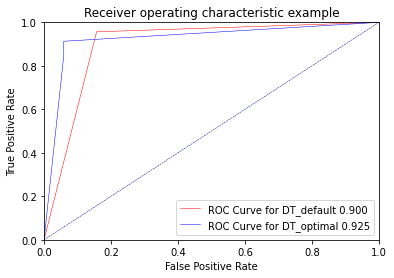

In [ ]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

By including the most optimal levels in our decision tree, we were able to avoid overfitting of the data by including too many variables. 

As you can see here, the optimal max level for the tree is 7. That includes the most important variables and predictors whilst removing other variables that may hinder results. 

In [ ]:
# save the best decision tree for future replication (nueral network)

dt_best = dt_cv_1

**2. From the better model, can you identify which patients could potentially be 'COVID-19 Positive'? Can you provide general characteristics of those patients?**

In [ ]:
print(treeRules)

|--- Leukocytes <= -0.38
|   |--- Basophils <= 1.15
|   |   |--- Platelets <= 0.03
|   |   |   |--- Hemoglobin <= -0.81
|   |   |   |   |--- class: 0
|   |   |   |--- Hemoglobin >  -0.81
|   |   |   |   |--- Leukocytes <= -0.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Leukocytes >  -0.82
|   |   |   |   |   |--- Eosinophils <= -0.67
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Eosinophils >  -0.67
|   |   |   |   |   |   |--- Red blood cell distribution width (RDW) <= -0.93
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Red blood cell distribution width (RDW) >  -0.93
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- Platelets >  0.03
|   |   |   |--- class: 0
|   |--- Basophils >  1.15
|   |   |--- class: 0
|--- Leukocytes >  -0.38
|   |--- Eosinophils <= -0.69
|   |   |--- Leukocytes <= 0.37
|   |   |   |--- Mean platelet volume  <= -0.49
|   |   |   |   |--- class: 0
|   |   |   |--- Mean platelet volume  >  -0.49
|   |   

If the class is 1, this means COVID-19 positive. 

The above tree rules shows certain parameters that can predict if the patient is COVID-19 positive. 

# Regression Model

### Build The Model
**Build a regression model using the default regression method with all inputs. Build another model tuned with GridSearchCV. Choose a better model to answer the following:**
* **a. Explain why you chose that model.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Our random seed
rs = 10

# Initiate the regression model
model = LogisticRegression(random_state=rs)

# Fit to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Checking the statistics of our model

# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9022222222222223
Test accuracy: 0.8350515463917526
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        51
           1       0.78      0.91      0.84        46

    accuracy                           0.84        97
   macro avg       0.84      0.84      0.83        97
weighted avg       0.85      0.84      0.83        97



In [ ]:
# Check the weights of the various features of the trained model
featureNames = X.columns
coef = model.coef_[0]

# We have 19 columns so loop through all those features 
coef = coef[:19]
for i in range(len(coef)):
  print(featureNames[i], ':', coef[i])

Patient age quantile : 0.06811174953107256
Proteina C reativa mg/dL : -0.1884135124646313
Neutrophils : 0.4048484720021302
Mean platelet volume  : -0.4661412555038894
Monocytes : 0.7737999613615659
Red blood cell distribution width (RDW) : -0.4501352949426492
Red blood Cells : -0.01848758953455659
Platelets : -1.0891655987462594
Eosinophils : -1.6129321493758
Basophils : -0.39464018999600814
Leukocytes : -2.026493047363629
Mean corpuscular hemoglobin (MCH) : 0.07762592495361344
Mean corpuscular volume (MCV) : -0.18679710342962316
Mean corpuscular hemoglobin concentration (MCHC) : 0.18181754129688021
Lymphocytes : 0.6633178027641354
Hemoglobin : 0.20297413582751048
Hematocrit : 0.12024480780574852
Influenza A : -0.35865110023837243
Influenza B : -2.0055690529930446


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initiate our grid search CV model instead
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), return_train_score=True, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=10, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
# We only want to fine tune the hyperparameter C in this case

result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.00626972, 0.00501256, 0.00510728, 0.00557747, 0.00723217,
       0.01096103, 0.01422932, 0.01865678, 0.01859043, 0.0186913 ]), 'std_fit_time': array([0.0009226 , 0.00035147, 0.00029571, 0.00046144, 0.00088517,
       0.00262289, 0.00361632, 0.00040987, 0.00074364, 0.00043619]), 'mean_score_time': array([0.00127752, 0.00103664, 0.00106184, 0.00104961, 0.00106211,
       0.00129783, 0.00121491, 0.0011929 , 0.00120203, 0.00121212]), 'std_score_time': array([2.02332886e-04, 9.47212741e-05, 9.29403848e-05, 4.53787913e-05,
       5.46697285e-05, 2.75594083e-04, 3.17546429e-05, 1.40538399e-05,
       5.08158370e-05, 2.36976554e-05]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


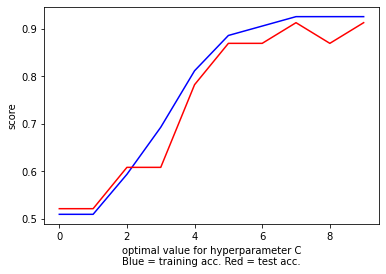

In [ ]:
import matplotlib.pyplot as plt

# Explore and plot the train and test score of the first split (split0)
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

# Plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('optimal value for hyperparameter C\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

From our plot the optimal value for hyperparameter C is about 6.3.

Total number of models:  10


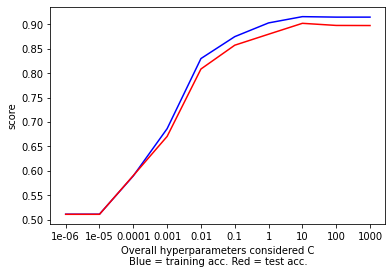

In [ ]:
# Consider all other splits and take their overall mean to be considered
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0, len(test_result)), test_result, 'r')
plt.xlabel('Overall hyperparameters considered C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [ ]:
print(cv.best_params_)

{'C': 10}


Based on all the splits, the optimal value for hyperparameter C is now around 10.

In [ ]:
# Checking the new accuracies based on the new derived hyperparameter C
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.9155555555555556
Test accuracy: 0.845360824742268


Since the grid search CV has a higher variance between train and test accurary **0.07055** vs **0.06722** of that of the logistical regression, we would be using our first model for the rest of this question since its has lower overfitting.

**b. Name the regression function used.**


The regression function used is logistic regression.

**c. Did you apply standardisation of variables? Why would you normalise the variables for regression mining?**


Yes, standardisation of variables is applied in our case for this regression model. We perform this as unstandardised data may introduce input variables that are on different scales, which renders the comparison between data points to be more complex. By applying standardisation, we ensure that the input variables are in a similar playing field, so to speak.

**d. Report on which variables are included in the regression model.**


The following are the parameters we included:

* Patient age quantile
* Proteina C reativa
* Neutrophils
* Mean platelet volume
* Monocytes
* Red blood cell distribution width (RDW)
* Red blood Cells
* Platelets
* Eosinophils
* Basophils
* Leukocytes
* Mean corpuscular hemoglobin (MCH)
* Mean corpuscular volume (MCV
* Mean corpuscular hemoglobin concentration (MCHC)
* Lymphocytes
* Hemoglobin
* Hematocrit
* Influenza A
* Influenza B


**e. Report the top five important variables (in the order) in the model.**


In [ ]:
# Get the absolute value fo all the variables, assign to a dataframe for quick sorting 
i = 0;
variable_list = []
for feature_name in featureNames:
  temp = []
  temp.append(feature_name)
  temp.append(abs(coef[i]))
  variable_list.append(temp)
  i += 1

# Sorted in decending order of importance, and get the top 5
df = pd.DataFrame(variable_list)
df_sorted = pd.DataFrame(df.sort_values(by=[1], ascending=False))
df_sorted.head(5)

,0,1
10,Leukocytes,2.026493
18,Influenza B,2.005569
8,Eosinophils,1.612932
7,Platelets,1.089166
4,Monocytes,0.773800


**f. What is classification accuracy on training and test datasets?**

For the logistic regression, we have:
* **Train accuracy: 0.9022**
* **Test accuracy: 0.8350**

For the grid search csv. we have:
* **Train accuracy: 0.9155**
* **Test accuracy: 0.8453**

**g. Report any sign of overfitting.**

Based on our findings previously:

Total number of models:  10


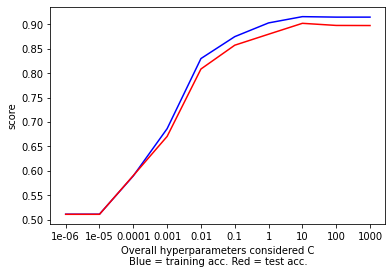

In [ ]:
# Consider all other splits and take their overall mean to be considered
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0, len(test_result)), test_result, 'r')
plt.xlabel('Overall hyperparameters considered C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

We can say that there is some signs of overfitting based on the logistic regression, the blue line which denotes the training accurary is slightly higher in values compared to the test accuracy, which is denoted in red.

### Reduced Variables Set
**Build another regression model on the reduced variables set. Perform dimensionality reduction with Recursive feature elimination. Tune the model with GridSearchCV to find the best parameter setting. Answer the following:**
* **a. Was dimensionality reduction useful to identify a good feature set for building the accurate model?**

In [ ]:
from sklearn.feature_selection import RFECV

# Perform recursive feature elimination with cross validation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train)

# Compare the feature set before and after elmination
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 19
Number of features after elimination 11


In [ ]:
# Transform the original input set but now with the features that was selected via elimination previously
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [ ]:
# Rerun the grid search cv but this time using the reduced feature set
params = {'C': [pow(10, x) for x in range(-6, 4)]}
rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))
y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.9111111111111111
Test accuracy: 0.865979381443299
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        51
           1       0.80      0.96      0.87        46

    accuracy                           0.87        97
   macro avg       0.88      0.87      0.87        97
weighted avg       0.88      0.87      0.87        97

{'C': 10}


Yes, dimensionailty reducetion was useful in building a more accurate model.
* Our previous run using the grid search cv gave us a test accuracy of: **0.8453**.
* The new test accuracy using the reduce feature set is: **0.8659**


**b. What is classification accuracy on training and test datasets?**

* Training accuracy: **0.9111**
* Test accuracy: **0.8659**

**c. Report any sign of overfitting.**


In [ ]:
# Get results from the new grid search cv model tuned using RFE + CV
result_set_rfe = rfe_cv.cv_results_
print(result_set_rfe)

{'mean_fit_time': array([0.00631485, 0.00606403, 0.00532336, 0.00609226, 0.00620866,
       0.00609365, 0.01034412, 0.01531444, 0.02100852, 0.02687798]), 'std_fit_time': array([0.00156599, 0.00041757, 0.0011209 , 0.00220191, 0.00215974,
       0.00163473, 0.00204213, 0.00171921, 0.00319816, 0.00616661]), 'mean_score_time': array([0.00063663, 0.00062366, 0.00061381, 0.00064516, 0.00062389,
       0.00118575, 0.0009228 , 0.00070186, 0.00096838, 0.00067971]), 'std_score_time': array([4.60377325e-05, 3.43360501e-05, 8.75504220e-05, 1.40006730e-05,
       2.30292602e-05, 1.61791155e-03, 8.38492404e-04, 8.62362868e-05,
       8.10009633e-04, 9.80070574e-05]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


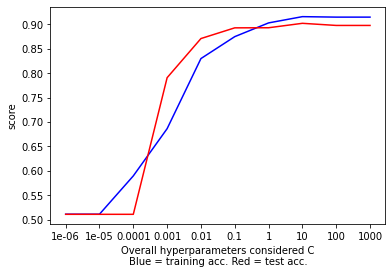

In [ ]:
# Consider all other splits and take their overall mean to be considered
train_result = result_set['mean_train_score']
test_result = result_set_rfe['mean_test_score']
print("Total number of models: ", len(test_result))

# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0, len(test_result)), test_result, 'r')
plt.xlabel('Overall hyperparameters considered C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

**c. Report the top five important variables (in the order) in the model.**


In [ ]:
# Check the weights of the various features of the trained model
featureNames = X.columns
coef = rfe_cv.best_estimator_.coef_[0]

# We have 11 columns so loop through all those features (11 is the reduce feature set)
coef = coef[:11]
for i in range(len(coef)):
  print(featureNames[i], ':', coef[i])

Patient age quantile : 2.4628999336109616
Proteina C reativa mg/dL : -0.6842929445048754
Neutrophils : 1.7829062789004593
Mean platelet volume  : -0.45332730017607326
Monocytes : -1.4549134348541741
Red blood cell distribution width (RDW) : -2.4687977234871523
Red blood Cells : -2.6151348474424205
Platelets : 2.561543941635295
Eosinophils : 0.22435818706231545
Basophils : -1.9296557706357411
Leukocytes : -5.4595186285074755


In [ ]:
# Get the absolute value fo all the variables, assign to a dataframe for quick sorting 
i = 0;
variable_list = []
for j in range(0, 10):
  temp = []
  temp.append(featureNames[j])
  temp.append(abs(coef[i]))
  variable_list.append(temp)
  i += 1

# Sorted in decending order of importance, and get the top 5
df = pd.DataFrame(variable_list)
df_sorted = pd.DataFrame(df.sort_values(by=[1], ascending=False))
df_sorted.head(5)

,0,1
6,Red blood Cells,2.615135
7,Platelets,2.561544
5,Red blood cell distribution width (RDW),2.468798
0,Patient age quantile,2.462900
9,Basophils,1.929656


### ROC Curve
**Produce the ROC curve for all different regression models. Using the best regression model, can you identify which patients could potentially be 'COVID-19 Positive'? Can you provide general characteristics of those patients?**

In [ ]:
# Collate accuracy score for the various models
y_pred_dt = model.predict(X_test)
y_pred_dt_cv = cv.predict(X_test)
y_pred_dt_cv_rfe = rfe_cv.predict(X_test_sel)

print("Accuracy score on test for Logistic Regression:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for Grid Search CV:", accuracy_score(y_test, y_pred_dt_cv))
print("Accuracy score on test for Grid Search CV with RFE", accuracy_score(y_test, y_pred_dt_cv_rfe))

Accuracy score on test for Logistic Regression: 0.8350515463917526
Accuracy score on test for Grid Search CV: 0.845360824742268
Accuracy score on test for Grid Search CV with RFE 0.865979381443299


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculating the ROC area under curve score
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_cv = cv.predict_proba(X_test)
y_pred_proba_cv_rfe = rfe_cv.predict_proba(X_test_sel)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_cv[:, 1])
roc_index_dt_cv_rfe = roc_auc_score(y_test, y_pred_proba_cv_rfe[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_small:", roc_index_dt_cv)
print("ROC index on test for DT_optimal:", roc_index_dt_cv_rfe)

ROC index on test for DT_default: 0.9224211423699914
ROC index on test for DT_small: 0.9296675191815855
ROC index on test for DT_optimal: 0.9373401534526854


In [ ]:
from sklearn.metrics import roc_curve

# Finding the false positive rate, true positive rate and thresholds used for each model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_cv[:,1])
fpr_dt_cv_rfe, tpr_dt_cv_rfe, thresholds_dt_cv_rfe = roc_curve(y_test, y_pred_proba_cv_rfe[:,1])

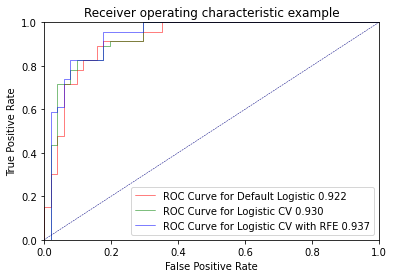

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for Default Logistic {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for Logistic CV {:.3f}'.format(roc_index_dt_cv), color='green', lw=0.5)
plt.plot(fpr_dt_cv_rfe, tpr_dt_cv_rfe, label='ROC Curve for Logistic CV with RFE {:.3f}'.format(roc_index_dt_cv_rfe), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

Using our best performing model, patients that are potentially Covid-19 positive are those that exhibit the following signatures that turn up in their tests: Leukocytes, Influenza B, Eosinophils, Platelets and Monocytes.

# Nueral Network

### Build the Network

In [ ]:
# running the import section again

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

# Initialize patient database
patientData = pd.read_excel("/content/drive/My Drive/data/dataset.xlsx")

# use only the data that we need 
patientData2 = patientData[['SARS-Cov-2 exam result',
                            'Patient age quantile', 
                            'Proteina C reativa mg/dL', 
                            'Neutrophils', 
                            'Mean platelet volume ', 
                            'Monocytes', 
                            'Red blood cell distribution width (RDW)', 
                            'Red blood Cells',
                            'Platelets',
                            'Eosinophils',
                            'Basophils',
                            'Leukocytes',
                            'Mean corpuscular hemoglobin (MCH)',
                            'Mean corpuscular volume (MCV)',
                            'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
                            'Lymphocytes',
                            'Hemoglobin',
                            'Hematocrit',
                            'Influenza A',
                            'Influenza B']]

# drop all na values, if we were to impute na values this would skew our findings as there is more than 50% of the data missing from each column.
patientData3 = patientData2.dropna(axis=0)

# map variables and ignore warnings

cov2ExamMap = {'negative':0, 'positive': 1}
patientData3['SARS-Cov-2 exam result'] = patientData3['SARS-Cov-2 exam result'].map(cov2ExamMap)

influenzaAMap = {'not_detected':0, 'detected': 1}
patientData3['Influenza A'] = patientData3['Influenza A'].map(influenzaAMap)

influenzaBMap = {'not_detected':0, 'detected': 1}
patientData3['Influenza B'] = patientData3['Influenza B'].map(influenzaBMap)

# one-hot encoding
df = pd.get_dummies(patientData3)
    
# target/input split
y = df['SARS-Cov-2 exam result']
X = df.drop(['SARS-Cov-2 exam result'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
negative = X[X['SARS-Cov-2 exam result']==0]
positive = X[X['SARS-Cov-2 exam result']==1]

# upsample minority
positiveUpsampled = resample(positive,
                          replace=True, # sample with replacement
                          n_samples=len(negative), # match number in majority class
                          random_state=10) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([positiveUpsampled, negative])

# target/input split with new upsampled dataframe
y = upsampled['SARS-Cov-2 exam result']
X = upsampled.drop(['SARS-Cov-2 exam result'], axis=1)

# setting up new upsampled testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# simple decision tree training
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

### Questions

2. What is classification accuracy on training and test datasets?

In [ ]:
from sklearn.neural_network import MLPClassifier

# choose random state
rs = 10

#create model with random state and no iterations
model_1 = MLPClassifier(random_state=rs)

#fit the model
model_1.fit(X_train, y_train)

# print classification accuracy for training and test data.
print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.9866666666666667
Test accuracy: 0.9072164948453608
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        51
           1       0.86      0.96      0.91        46

    accuracy                           0.91        97
   macro avg       0.91      0.91      0.91        97
weighted avg       0.91      0.91      0.91        97

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


3. Did the training process converge and result in the best model?

The default network performed with high accuracy on our dataset. However, our test accuracy was a little lower. We can raise max iterations hyperparameter to see if that makes any difference on our test accuracy. 

In [ ]:
# create new model with max iterations at 700
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

# print classification accuracy of test and train on model_2
print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 1.0
Test accuracy: 0.8865979381443299
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.86      0.91      0.88        46

    accuracy                           0.89        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.89      0.89      0.89        97

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


We can see that if we raise the iterations of the MLP classifer to 700, it removed the convergence warning. We can see that train accuracy raised, but test accuracy reduces. This is a sign of overfitting so our default model would be better to use. 

Next we will use GridSearch tuning and dimensionality techniques to control the overfitting of the data. 

### Refine Network

**Refine this network by tuning it with GridSearchCV.**

1. Explain the parameters used in building this model, e.g. network architecture, iterations, activation function, etc.

The algorithm used to find the optimal weight in the nueral network is called `solver` in `sklearn`. The most common algorithm to find the best weights is called `gradient descent`. `Gradient descent` starts with a randomly generated set of weights, and per iteration of instance, adjust the weights accordingly. This is because predictions are made on the `X_train` data and error value or cost is calculated. The weights are adjusted to reduce the cost or error value. The cycle is repeated for all instances in the training set, with small adjustments being made after each instance. 

Each run through an entire training set in this context is called an `epoch`. A nueral network is made up of many `epochs`.

Nueral net algorithms use several different `stopping rules` to control when training ends. 

1. Stop after a specified number of `epochs`
2. Stop when error measures fall below a certain level
3. Stop when the the error has seen no improvement over a certain number of epochs.

The `activation function` of a nueral network is a logistic function and is found in the hidden layers of a network. There are several options of `activation functions` we can use, however, in this case we use the **relu** function as it produces the same accuracy with less time. 

> **relu - rectified linear unit**: $f(x) = max(x,0)$

Its important to not restrict the number of outnodes in a nueral network. There can be multiple outputs representing simultaneous predictions. The number of hidden nodes is generally increased with number of inputs and complexity of the problem. However, too many hidden nodes can lead to overfitting of the data and too few can result in underfitting. This is where `GridSearch` comes in handy to find the right hyperparameters.

In [ ]:
# see how amny input features we have by printing the dimensions of X_train
print(X_train.shape)

(225, 19)


A general rule of the number of nuerons you should have in each hidden layer, should be no more than the number of inputs (19) and no less than output nuerons (in this case, 1).

In [ ]:
params = {'hidden_layer_sizes': [(x,) for x in range(2, 20, 1)]}

# create new variable for gridsearch NN
cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

# print training and test accuracy
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

# print classification accuracy
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

# print gridsearch NN best parameters 
print(cv_1.best_params_)

Train accuracy: 0.9422222222222222
Test accuracy: 0.8865979381443299
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.86      0.91      0.88        46

    accuracy                           0.89        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.89      0.89      0.89        97

{'hidden_layer_sizes': (18,)}


Now that we have confirmed that 18 is the best number of nodes for the hidden layer. We will need to tune the second hyperparameter, alha, which is the learning rate of the `gradient descent` algorithm.

Larger `alpha` means the `gradient descent` will take "larger" steps and train faster, but it might miss optimal solution. Smaller alpha means smaller steps, which means slower training speed. 

In [ ]:
params = {'hidden_layer_sizes': [(16,), (17,), (18,), (19,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}

# print gridsearch NN with alpha parameters included also, put 18 hidden nuerons
cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, hidden_layer_sizes=18), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=18,
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=10, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha

2. What is classification accuracy on training and test datasets?

In [ ]:
print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.9422222222222222
Test accuracy: 0.8865979381443299
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        51
           1       0.86      0.91      0.88        46

    accuracy                           0.89        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.89      0.89      0.89        97

{'alpha': 0.01, 'hidden_layer_sizes': (18,)}


3. Did the training process converge and result in the best model? Do you see any sign of overfitting?

The training process did not converge. Training and Test accuracy are very high, and there isn't any evidence of overfitting. 

Our optimal number of of nuerons in the hidden layer should be 18, which is a complex model. However, due to only have 225 instances, it was not that computationally powerful and we were able to `GridSearch` 2-19 numbers of neurons per hidden layer.  We were also able to indentify our optimal `alpha` as 0.01. 


### Feature Selection

**Would feature selection help in improving the model? Build another neural network model with reduced features set. Perform dimensionality reduction by selecting variables with the decision tree (use the best model from 7.12 Activity 2: Making a decision tree for Assignment 2). Tune the model with GridSearchCV to find the best parameters setting.**


In [ ]:
dt_best = dt_cv_1_gs

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}


In [ ]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

Leukocytes : 0.4160609242630557
Basophils : 0.1407742800149687
Eosinophils : 0.13146283583348067
Platelets : 0.09938520230689661
Hemoglobin : 0.08966423738033928
Red blood cell distribution width (RDW) : 0.07427111978458134
Mean platelet volume  : 0.04838140041667771
Proteina C reativa mg/dL : 0.0
Neutrophils : 0.0
Monocytes : 0.0
Red blood Cells : 0.0
Influenza B : 0.0
Influenza A : 0.0
Mean corpuscular hemoglobin (MCH) : 0.0
Mean corpuscular volume (MCV) : 0.0
Mean corpuscular hemoglobin concentration (MCHC) : 0.0
Lymphocytes : 0.0
Hematocrit : 0.0
Patient age quantile : 0.0


In [ ]:
from sklearn.feature_selection import SelectFromModel

selectModel = SelectFromModel(dt_best.best_estimator_, prefit=True)
xTrainSelectModel = selectModel.transform(X_train)
xTestSelModel = selectModel.transform(X_test)

print(xTrainSelectModel.shape)

(225, 6)


In [ ]:
params = {'hidden_layer_sizes': [(x,) for x in range(2, 8, 1)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(xTrainSelectModel, y_train)

print(cv_sel_model.best_params_)

{'alpha': 0.01, 'hidden_layer_sizes': (7,)}


1. Did feature selection favour the outcome? Any change in network architecture? What inputs are being used as the network input?

The Neural Network model trained with decision tree selected variables did not manage to improve model performance. 

The feature selection did not favour the outcome. It seems our model needs large amount hidden layers to perform at its best.

The inputs being used for input selection are as followed (in descending order of importance). 

1. Leukocytes
2. Basophils
3. Eosinophils
4. Platelets
5. Hemoglobin
6. Red blood cell distribution width (RDW)
7. Mean platelet volume



2. What is classification accuracy on training and test datasets?

In [ ]:
print("Train accuracy:", cv_sel_model.score(xTrainSelectModel, y_train))
print("Test accuracy:", cv_sel_model.score(xTestSelModel, y_test))

y_pred = cv_sel_model.predict(xTestSelModel)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8577777777777778
Test accuracy: 0.7835051546391752
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        51
           1       0.72      0.89      0.80        46

    accuracy                           0.78        97
   macro avg       0.80      0.79      0.78        97
weighted avg       0.80      0.78      0.78        97



3. How many iterations are now needed to train this network?

There is no specific number of iterations needed to train the network. There was no convergence warning notified earlier.

4. Do you see any sign of overfitting?

There is signs of overfitting as we start to introduce new parameters to the nueral network. It seems to do its best on the default setting. However, we will need to determine this with ROC tests.

5. Did the training process converge and result in the best model?

The Neural Network model trained with decision tree selected variables did not manage to improve model performance.

### ROC Curves

**Produce the ROC curve for all different NNs. Using the best neural network model, which patients could potentially be 'COVID-19 Positive'? Can you provide general characteristics of those patients? Is it easy to comprehend the performance of a neural network model for decision-making?**

A total of five has been built:

1. Default neural network (`model_1`)
2. Neural network with 700 iterations (`model_2`)
3. Neural network + grid search (optimal nuerons) (`cv_1`)
4. Neural network + grid search (optimal nuerons & alpha) (`cv_2`)
7. Neural network + feature selection using optimal DT + grid search (`cv_sel_model`)


In [ ]:
from sklearn.metrics import roc_auc_score

yPredProbaNn1 = model_1.predict_proba(X_test)
yPredProbaNn2 = model_2.predict_proba(X_test)
yPredProbaCv3 = cv_1.predict_proba(X_test)
yPredProbaCv2 = cv_2.predict_proba(X_test)
yPredProbaCvSelModel = cv_sel_model.predict_proba(xTestSelModel)


rocIndexNn1 = roc_auc_score(y_test, yPredProbaNn1[:, 1])
rocIndexNn2 = roc_auc_score(y_test, yPredProbaNn2[:, 1])
rocIndexCv1 = roc_auc_score(y_test, yPredProbaCv3[:, 1])
rocIndexCv2 = roc_auc_score(y_test, yPredProbaCv2[:, 1])
rocIndexCvSelModel = roc_auc_score(y_test, yPredProbaCvSelModel[:, 1])


print("ROC index on test for NN_default:", rocIndexNn1)
print("ROC index on test for NN with 700 iterations:", rocIndexNn2)
print("ROC index on test for NN with gridsearch (optimal nuerons):", rocIndexCv1)
print("ROC index on test for NN with gridsearch 2 (optimal neurons & alpha)", rocIndexCv2)
print("ROC index on test for NN with DT at max level 7, and gridsearch:", rocIndexCvSelModel)

ROC index on test for NN_default: 0.9458653026427963
ROC index on test for NN with 700 iterations: 0.9458653026427962
ROC index on test for NN with gridsearch (optimal nuerons): 0.93691389599318
ROC index on test for NN with gridsearch 2 (optimal neurons & alpha) 0.93691389599318
ROC index on test for NN with DT at max level 7, and gridsearch: 0.9100596760443308


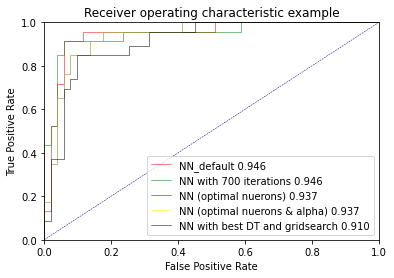

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, yPredProbaNn1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, yPredProbaNn2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, yPredProbaCv3[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, yPredProbaCv2[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, yPredProbaCvSelModel[:,1])

#plot the lines for each NN 
plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(rocIndexNn1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with 700 iterations {:.3f}'.format(rocIndexNn2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN (optimal nuerons) {:.3f}'.format(rocIndexCv1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN (optimal nuerons & alpha) {:.3f}'.format(rocIndexCv2), color='yellow', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with best DT and gridsearch {:.3f}'.format(rocIndexCvSelModel), color='black', lw=0.5)

# plot the default line, limits, labels, legend, and title
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()